In [1]:
from tensorflow.keras.applications import VGG16
import os
import numpy as np
conv_base = VGG16(
    weights='imagenet',
    include_top = False,
    input_shape = (150,150,3)
)

In [2]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [3]:
base_dir = os.getcwd()
val_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')
train_dir = os.path.join(base_dir, 'train')

In [4]:
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               2097408   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [12]:
len(model.trainable_weights)

30

In [13]:
conv_base.trainable = False
len(model.trainable_weights)

4

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

model.compile(
    loss='binary_crossentropy',
    optimizer=optimizers.RMSprop(lr=2e-5),
    metrics=['acc'])

history = model.fit_generator(
train_generator,
steps_per_epoch=150,
epochs=10,
validation_data=validation_generator,
validation_steps=50
)
model.save('men_and_women_2.h5')

Found 1495 images belonging to 2 classes.
Found 664 images belonging to 2 classes.
Epoch 1/10
150/150 [==============================] - 267s 2s/step - loss: 0.4526 - acc: 0.7920 - val_loss: 0.4996 - val_acc: 0.7541
Epoch 2/10
150/150 [==============================] - 288s 2s/step - loss: 0.4464 - acc: 0.7896 - val_loss: 0.4999 - val_acc: 0.7470
Epoch 3/10
150/150 [==============================] - 262s 2s/step - loss: 0.4221 - acc: 0.7993 - val_loss: 0.5037 - val_acc: 0.7622
Epoch 4/10
150/150 [==============================] - 256s 2s/step - loss: 0.4224 - acc: 0.8104 - val_loss: 0.4756 - val_acc: 0.7785
Epoch 5/10
150/150 [==============================] - 247s 2s/step - loss: 0.4107 - acc: 0.8077 - val_loss: 0.4981 - val_acc: 0.7652
Epoch 6/10
150/150 [==============================] - 246s 2s/step - loss: 0.4103 - acc: 0.8104 - val_loss: 0.4878 - val_acc: 0.7754
Epoch 7/10
150/150 [==============================] - 299s 2s/step - loss: 0.3945 - acc: 0.8227 - val_loss: 0.4740 - va

In [5]:
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt 
from PIL import Image
import numpy as np
import tensorflow as tf

def get_prediction(img_path):
    img = Image.open("Testers/" + img_path)
    img = img.resize((150,150),Image.ANTIALIAS)
    img = np.asarray(img)
    plt.imshow(img)
    img = np.expand_dims(img, axis=0)
    img = tf.cast(img, tf.float32)
    x = model.predict(img)
    print("Prediction = ", end = '')
    if(x[0] < 0.5):
        print("male")
    else:
        print("female")
    print("Probability = ", x[0])

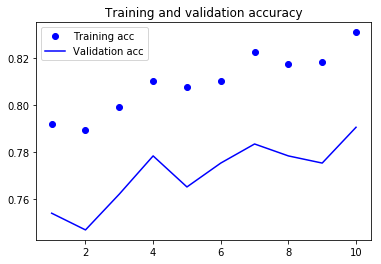

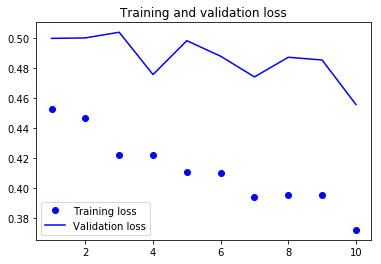

In [52]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

Prediction = female
Probability =  [1.]


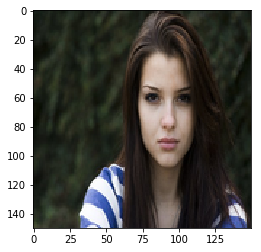

In [25]:
get_prediction("girl.jpg")

Prediction = male
Probability =  [0.]


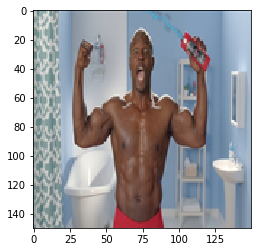

In [26]:
get_prediction("terry.jpg")

Prediction = female
Probability =  [1.]


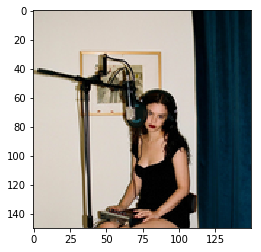

In [35]:
get_prediction("sclaude2.jpg")

Prediction = male
Probability =  [0.]


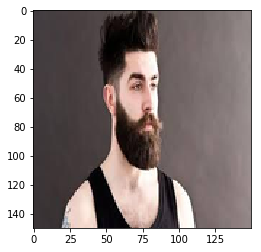

In [45]:
get_prediction("beard.jpg")

Prediction = female
Probability =  [1.]


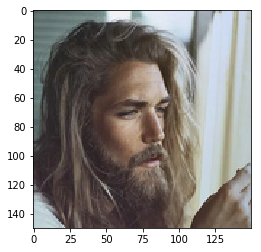

In [46]:
get_prediction("longhairguy.jpg")

Prediction = female
Probability =  [1.]


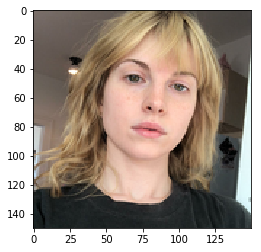

In [56]:
get_prediction("hayley.jpg")